# Data visualization

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import numpy as np

path = r"C:\Users\hungn\Documents\GitHub\Movies-Recommendation-System\data"

In [13]:
ratings = pd.read_csv(os.path.join(path, 'p_ratings.csv'))
movies = pd.read_csv(os.path.join(path, 'p_movies.csv'))

In [14]:
ratings.head(3)

,Unnamed: 0,userId,movieId,rating
0,27,0,0,3.0
1,447,1,1,2.5
2,961,2,2,5.0


In [15]:
movies.head(5)

,Unnamed: 0,genres,id,title,description,cast,crew,keywords,cast_size,crew_size,director,soup
0,0,"['Animation', 'Comedy', 'Family']",16,Toy Story,"Led by Woody, Andy's toys live happily in his ...","['tomhanks', 'timallen', 'donrickles']","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","['jealousi', 'friendship', 'friend', 'rivalri'...",13,106,"['johnlasseter', 'johnlasseter', 'johnlasseter']",jealousi friendship friend rivalri toycomestol...
1,1,"['Adventure', 'Fantasy', 'Family']",25,Jumanji,When siblings Judy and Peter discover an encha...,"['robinwilliams', 'jonathanhyde', 'kirstendunst']","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",[],26,16,"['joejohnston', 'joejohnston', 'joejohnston']",robinwilliams jonathanhyde kirstendunst joejoh...
2,5,"['Action', 'Crime', 'Drama', 'Thriller']",8,Heat,"Obsessive master thief, Neil McCauley leads a ...","['alpacino', 'robertdeniro', 'valkilmer']","[{'credit_id': '52fe4292c3a36847f802916d', 'de...","['robberi', 'detect', 'bank', 'obsess', 'chase...",65,71,"['michaelmann', 'michaelmann', 'michaelmann']",robberi detect bank obsess chase thief murder ...
3,9,"['Adventure', 'Action', 'Thriller']",14,GoldenEye,James Bond must unmask the mysterious head of ...,"['piercebrosnan', 'seanbean', 'izabellascorupco']","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",['kgb'],20,46,"['martincampbell', 'martincampbell', 'martinca...",kgb piercebrosnan seanbean izabellascorupco ma...
4,14,"['Action', 'Adventure']",2,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...","['geenadavis', 'matthewmodine', 'franklangella']","[{'credit_id': '52fe42f4c3a36847f802f69f', 'de...",[],31,16,"['rennyharlin', 'rennyharlin', 'rennyharlin']",geenadavis matthewmodine franklangella rennyha...


In [ ]:
movie_ids_in_ratings = ratings['movieId'].unique()
print(f"Number of movie IDs in ratings dataframe: {len(movie_ids_in_ratings)}")
movie_ids_in_movies = movies['id'].unique()
print(f"Number of movie IDs in movies dataframe: {len(movie_ids_in_movies)}")
missing_ids_ratings = [movie_id for movie_id in movie_ids_in_ratings 
                     if movie_id not in movie_ids_in_movies]
missing_ids_movies = [movie_id for movie_id in movie_ids_in_movies 
                     if movie_id not in movie_ids_in_ratings]
print(f"Number of movie IDs present in ratings but missing from movies: {len(missing_ids_ratings)}")
print(f"Percentage of missing movies: {len(missing_ids_ratings) / len(movie_ids_in_ratings) * 100:.2f}%")

print(f"Number of movie IDs present in movies but missing from ratings: {len(missing_ids_movies)}")
print(f"Percentage of missing movies: {len(missing_ids_movies) / len(movie_ids_in_movies) * 100:.2f}%")

Number of movie IDs in ratings dataframe: 28
Number of movie IDs in movies dataframe: 28
Number of movie IDs present in ratings but missing from movies: 0
Percentage of missing movies: 0.00%
Number of movie IDs present in movies but missing from ratings: 0
Percentage of missing movies: 0.00%


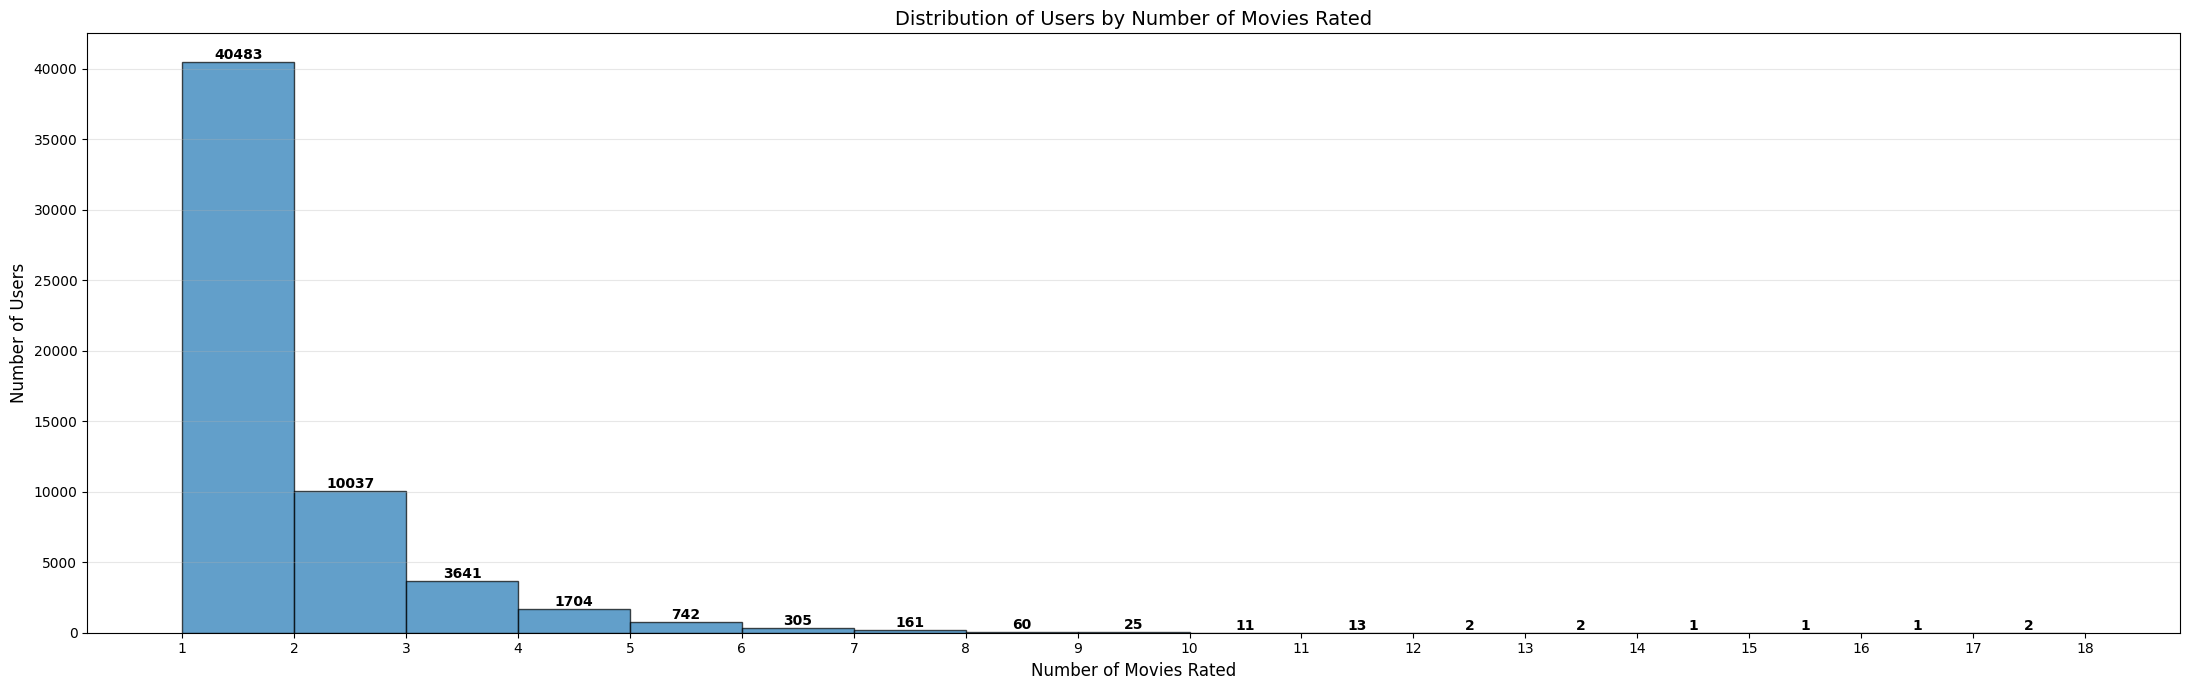

In [22]:
df = ratings
user_rating_counts = df.groupby('userId').size().reset_index(name='movies_rated')
max_movies = user_rating_counts['movies_rated'].max()
bins = np.arange(1, max_movies, 1)

plt.figure(figsize=(22, 7))

counts, edges, patches = plt.hist(user_rating_counts['movies_rated'], bins=bins, 
                                  edgecolor='black', alpha=0.7)

for i in range(len(counts)):
    if counts[i] > 0:  
        plt.text(edges[i] + (edges[i+1] - edges[i])/2, counts[i], 
                 f'{int(counts[i])}', 
                 ha='center', va='bottom', fontweight='bold')

plt.xlabel('Number of Movies Rated', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Distribution of Users by Number of Movies Rated', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(bins)
plt.tight_layout()
plt.show()

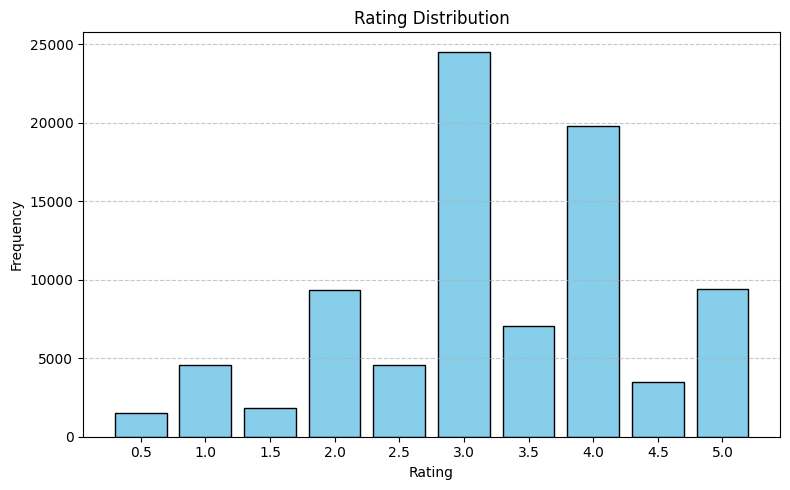

In [23]:
rating_counts = ratings['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(rating_counts.index, rating_counts.values, 
               color='skyblue', edgecolor='black', width=0.4)  # Thinner bars

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()